# Individual Analysis for the H-D Spectrum Experiment

## Peak-fit method

### Name: Zachary Banken
### Date: 5/23/23

This template uses a multiple peak-fitting calculation to obtain the peak locations.  It is more sophisticated than the centroid method, but shares some features.

Use this template to carry out the analysis tasks for the HD spectrum experiment.  You may need to consult the documentation for different Python packages.  Also recommended: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

## First, import some packages

This is a good idea at the beginning of your notebook to include the packages that you will need.  We will use the four shown below here.  A brief description:
* `numpy` is the foundational package for Python numerical work. It extends and speeds up array operations beyond standard Python, and it includes almost all math functions that you would need for example `sqrt()` (square root) or `cos()` (cosine).  These would be written in code as `np.sqrt()` or `np.cos()`.
* `scipy` is a huge collection of scientific data analysis functions, routines, physicical constants, etc.  This is the second most used package for scientific work. Documentation is at [SciPy.org](https://docs.scipy.org/doc/scipy/reference/) with the constants subpackage at https://docs.scipy.org/doc/scipy/reference/constants.html.
* `uncertainties` is a very useful small package that simplifies uncertainty propagation and printing out of quantities with uncertainty.  Documentation is at https://pythonhosted.org/uncertainties/
* `matplotlib` is *the* standard plotting package for scientific Python.  We will use a subset called `pyplot` which is modeled after the plotting functions used in MATLAB. The last line below, `%matplotlib inline`, simply forces the plots to appear within the notebook.
* `pandas` is a large data science package.  It's main feature is a set of methods to create and manipulate "Dataframes", which is an enlargement of the idea of an array.  It plays well with NumPy and other packages.  We will use it mainly as a way to read files into data sets in an easy way.

We will also be using the [**LMFit**](https://lmfit.github.io/lmfit-py/) curve fitting package.  This library is very powerful and relatively easy to use to perform complex fitting of functions to data sets, and to also extract meaningful values for statistical uncertainties in the fitting parameters.  It will be introduced and imported later in the template.  Documentation is at https://lmfit.github.io/lmfit-py/

In [196]:
# Run this cell with Shift-Enter, and wait until the asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as up
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### Exercise 1

In [197]:
## see group notebook for explanation of exercises

H_D_ratio = 2*(1+1/1836)/(2+1/1836)
H_D_difference = 6563*(1-1/H_D_ratio)

Na_D_difference = 5895.92-5889.95
print(Na_D_difference)
H_D_difference/Na_D_difference

5.970000000000255


0.2992188304978427

In [198]:

step_freq = (360)*(Na_D_difference/32)
print('stepper motor drive frequency estimate: {:.3}'.format(step_freq), 'Hz')

stepper motor drive frequency estimate: 67.2 Hz


In [199]:
H_D_difference*(32/Na_D_difference)*(1/4)

2.3937506439827416

#### Exercise 2

In [200]:
def balmer_wavelength(n2):
    n1 = 2
    R = const.Rydberg
    l = 1 / (R * ((1/n1**2)-(1/n2**2)))
    return l * 1e10

print('Transition : Wavelength (A)')
for n in range(3,15):
    print(n,'-->',2,':',round(balmer_wavelength(n),1))

Transition : Wavelength (A)
3 --> 2 : 6561.1
4 --> 2 : 4860.1
5 --> 2 : 4339.4
6 --> 2 : 4100.7
7 --> 2 : 3969.1
8 --> 2 : 3888.1
9 --> 2 : 3834.4
10 --> 2 : 3796.9
11 --> 2 : 3769.7
12 --> 2 : 3749.2
13 --> 2 : 3733.4
14 --> 2 : 3721.0


## Part 1 - Calibration

### Read in the data

It is always a good idea to make a plot of the raw data before trying to manipulate it. Before doing this, you should open a data file with a simple text editor to see what it looks like.  You will see some information at the beginning about th oscilloscope's parameters.

Then use the **Pandas** function `read_csv()` to pull the file into a Pandas Dataframe, like this:

```
Na = pd.read_csv('Na_D_lines.csv', skiprows=15)
```

The variable `skiprows` makes the function skip over the header information in the data file produced by the oscilloscope.

If the last line in the cell is the name of the dataframe, it will print a nice table.

You may obtain the arrays for each column by using the column label, e.g., `Na['CH1']` is the array of the first column.

In [201]:
# These lines allow the user to enter a data file
# df = pd.read_csv(filename,skiprows=15)  # skiprows skips header information.

# Collect all the data sets into active dataframes.
Na = pd.read_csv('NaD.csv',header='infer') 
Na['TIME'] = Na['X']; Na['CH1'] = Na[' Y0']

Na2 = pd.read_csv('NaD2.csv',header='infer')
Na2['TIME'] = Na2['X']; Na2['CH1'] = Na2[' Y0']


In [202]:
# Just using the label alone causes the dataframe to be displayed.

# The "[:10]" truncates the view to the first 10 rows.

Na[:10]

,X,Y0,TIME,CH1
0,0.0000,0.0004,0.0000,0.0004
1,0.0086,0.0067,0.0086,0.0067
2,0.0171,0.0068,0.0171,0.0068
3,0.0257,0.0070,0.0257,0.0070
4,0.0343,0.0069,0.0343,0.0069
5,0.0428,0.0068,0.0428,0.0068
6,0.0514,0.0068,0.0514,0.0068
7,0.0600,0.0070,0.0600,0.0070
8,0.0685,0.0069,0.0685,0.0069
9,0.0771,0.0068,0.0771,0.0068


### Plot the data

Below, I show how. Study the commands, change them, and see what happens.  Hint: study the sections in the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) on Matplotlib.

Note also the minus sign in front of `Na['CH1']` in the `plt.plot()` function below.  What happens if you remove it?


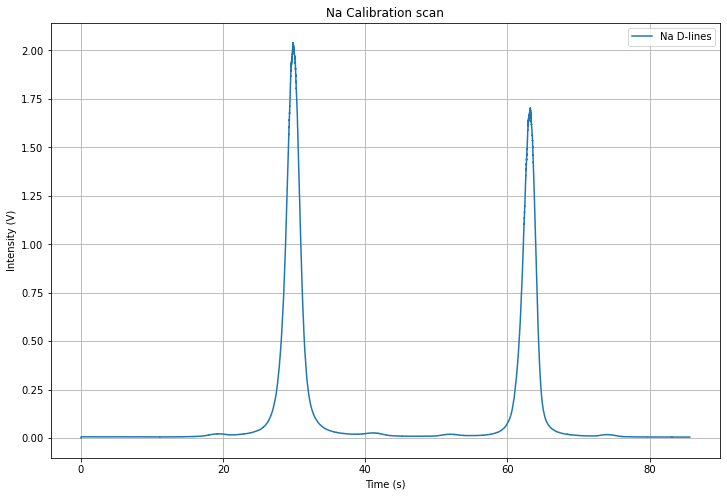

In [203]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Na Calibration scan')
plt.ylabel(r'Intensity (V)')
plt.xlabel(r'Time (s)')
plt.plot(Na['TIME'],Na['CH1'],'-',label='Na D-lines')
plt.legend();

### Locate the peak maxima

There are two parts to this.  Part 1 is to smooth the data, part 2 is to locate the maxima of the smoothed data and the width of the peaks located under the maxima.

To do this we will need two functions from SciPy.

In [204]:
## Import functions from SciPy's collection.  You only need to do an import once in a given session
from scipy.ndimage import gaussian_filter1d
from scipy.signal import find_peaks

**Part 1.** First, you want to smooth the y-axis (voltage) data a little bit.  Look closely at the plot, and you will notics a kind of "stairstep" quality, especially near the baseline.  This is the limit of the digitization resolution. Smoothing the data a small amount will remove much of this and make it easier to see the shape of the curve.

One way is to use "Gaussian filtering" to do this.  Gaussian filtering uses a gaussian to convolve with the data set.  The numerical parameter parameter gives the width of the gaussian; larger widths mean more smoothing.

In [205]:
# Smoothing with a parameter of 5
# This way of doing it adds another column to the dataframe.
Na['CH1_smoothed'] = gaussian_filter1d(Na['CH1'], 5)
Na2['CH1_smoothed'] = gaussian_filter1d(Na2['CH1'], 5)

Try plotting the smoothed data over the original data.  Then change the `5` in the `gaussian_filter1d()` function to `100` and see what happens.  **Message:** Be careful with smoothing data sets!

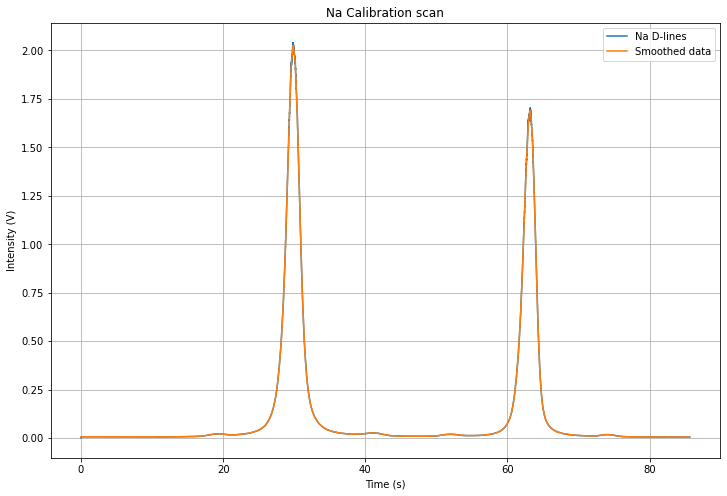

In [206]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Na Calibration scan')
plt.ylabel(r'Intensity (V)')
plt.xlabel(r'Time (s)')
plt.plot(Na['TIME'],Na['CH1'],'-',label='Na D-lines')
plt.plot(Na['TIME'],Na['CH1_smoothed'],'-',label='Smoothed data')
plt.legend();

**Part 2.** Second, you can use a peak-finding function from SciPy.  This will locate the array indices of peaks in the data sets that satisfy certain criteria.  Using this function takes some care.  You should plot the peak locations and other parameters you are trying to find to make sure it is doing what you want.

I show an example below.

In [207]:

# assign current arrays to xdata, ydata
ydata = Na['CH1_smoothed']
xdata = Na['TIME']

# A "min width" keeps small fluctuations near the top from being labeled separate peaks
# Width units are array indices
min_width = 50

# Below does the work.  The height parameter makes the function only look 
# for peaks higher than halfway up the tallest peak.
peaks, pk_props = find_peaks(ydata, width = min_width, height = ydata.max()/2.)

for pk, prop in zip(peaks, pk_props['widths']): 
    print('Peak at {:d} has width {:.1f}'.format(pk, prop))


Peak at 3484 has width 248.3
Peak at 7377 has width 232.5


Show this with a plot.  Note the use of vlines() and hlines()

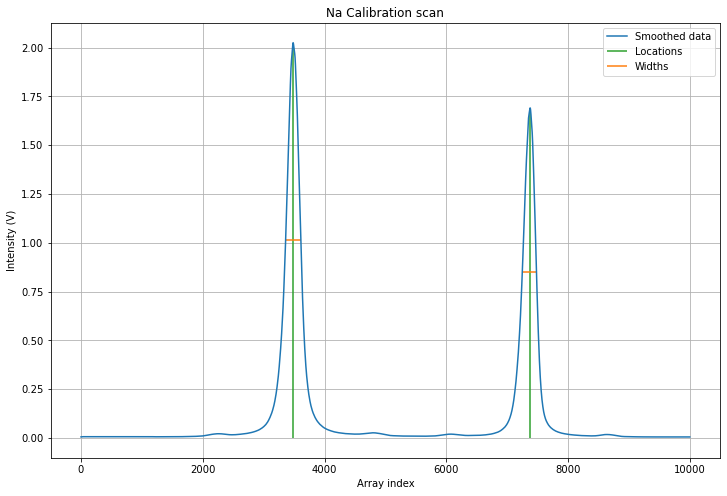

In [208]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('Na Calibration scan')
plt.ylabel(r'Intensity (V)')
plt.xlabel(r'Array index')
plt.plot(ydata,'-',label='Smoothed data')
plt.vlines(x=peaks, ymin=0, ymax=ydata[peaks], color='C2', label='Locations')
plt.hlines(y=pk_props['width_heights'], xmin=peaks-pk_props['widths']/2, 
           xmax=peaks+pk_props['widths']/2, color = 'C1', label='Widths')
plt.legend();

You can now save the peak positions and widths.  These will be used to determine starting values for a peak-fitting routine.

The peak positions and widths are in units of array index.  One needs to convert to the units of the `xdata`.

In [209]:
xpeaks = np.array([xdata[peaks[0]], xdata[peaks[1]]])
xpeaks

array([29.8433, 63.19  ])

In [210]:
idx2time = (xdata[peaks[1]]-xdata[peaks[0]])/(peaks[1]-peaks[0])
xwidths = pk_props['widths']*idx2time
xwidths

array([2.12660293, 1.99156372])

## Fit the peaks

To fit the data to peaks, make use of the **lmfit** package. It is a useful add-on to the SciPy fitting functions.  This package simplifies fitting data to a variety of standard functions.  See the [Lmfit Documentation](https://lmfit.github.io/lmfit-py/index.html) for a full discussion.  The package is quite powerful, but for basic fitting with common functions, it is very easy to use.  

#### Example: Fitting a line

We'll start with an example fit to a line.  You will use a line fit later in the notebook, but it is simpler than a peak fit, so it makes a good beginning example.

The example shows how to fit data to a line, obtain the fit parameters along with uncertainties, and then plot the data and fit. Execute the cells and study how it works. 

The first cell is just example data. (They come from a calibration problem in physics 331, optics lab)  You will modify the function calls when you use it on your own results later

In [211]:
# Calibration Data
# First column is wavelength (nm), second is carriage poisition (cm)
#
Cal_data = np.array([
    [643.85, 41.43],
    [579.07, 37.24],
    [576.96, 37.11],
    [546.08, 35.10],
    [508.58, 32.68],
    [479.99, 30.83],
    [467.81, 30.04],
    [435.83, 27.96],
    [404.66, 25.98]])

# Array slicing separates x (position) and y (wavelength)
# Goal of calibration is to be able to feed in a position and obtain a wavelength
wavelength = Cal_data[:,0]
position = Cal_data[:,1]

Here is the fitting example.  Note the very first command to import a fitting "Model" called `LinearModel`.

A "Model" is an LMFit object that contains information about the fitting function and methods to help set up and manipulate the fitting parameters.  Notice what each line does, and how the return value of the function call is used in subsequent calls.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 9
    # variables        = 2
    chi-square         = 0.18041902
    reduced chi-square = 0.02577415
    Akaike info crit   = -31.1872805
    Bayesian info crit = -30.7928313
[[Variables]]
    slope:      15.4639413 +/- 0.01139807 (0.07%) (init = 15.46394)
    intercept:  3.20598011 +/- 0.38164201 (11.90%) (init = 3.20598)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.990

Slope =  15.463941344548298 +/- 0.01139806675222934


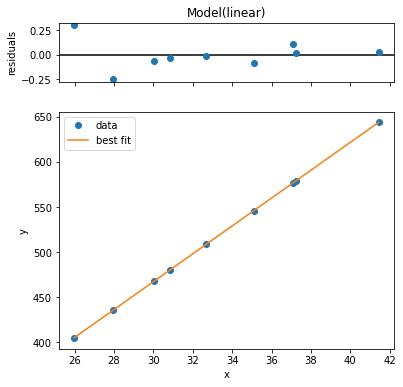

In [212]:
# imports a linear fitting model from lmfit
# You only need to execute this line once!
from lmfit.models import LinearModel

# create an instance of the model
line = LinearModel()

# One must have a guess of the parameters. The guess() method works with most of the standard
# lmfit models
param_guess = line.guess(wavelength, x=position)

# The line below executes the fitting process.  The results are returned to "line_fit"
line_fit = line.fit(wavelength, param_guess, x=position)

# This prints the results in an easy to read form
print(line_fit.fit_report())

# The parameters and uncertainties are accessible as follows, for example:
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)

#Then you can plot the results quickly just to see how it looks using the plot() method
line_fit.plot();

## Make the peak-fitting model

Now we expand the example to a more complicated problem: a fit of two Gaussian peaks and a constant background.

The Gaussian peak has the form
$$f(x; A,\mu,\sigma) = \frac{A}{\sigma \sqrt{2\pi}}e^{[(x-\mu)^2/2\sigma^2]}\;.$$ 
The parameters are `amplitude`, `center`, and `sigma`. In addition, parameters `fwhm` and `height` are included as constraints to report full width at half maximum and maximum peak height, respectively.

Note that the `height` of the peak at the center ($x=\mu$) is equal to $\frac{A}{\sigma\sqrt{2\pi}}$ and that the full-width at half-maximum is about 2.3548$\sigma$.

Thus, to estimate the amplitude $A$, estimate the height $h$ and FWHM from a graph, and calculate $A = h*$FWHM.

The contant background sets the height of the data set "floor." 

In [213]:
# Import a gaussian peak and second order polynomial for background

from lmfit.models import ConstantModel, GaussianModel

# create an instance of the model
# Note the use of prefixes
model = ConstantModel() + GaussianModel(prefix='p1_') + GaussianModel(prefix='p2_')

# Necessary step below.  This replaces the guess() method used earlier.  The guess() method 
# does not work for composite models.
params = model.make_params()

# Notice how the prefixes are attached to the parameter names.
print('parameter names: {}'.format(model.param_names))

parameter names: ['c', 'p1_amplitude', 'p1_center', 'p1_sigma', 'p2_amplitude', 'p2_center', 'p2_sigma']


### Setting the parameters

For a composite fit, when you cannot use `guess()`, you need to set the values of the parameters by hand. Information has already been found to do this from the above peak-finding steps.

Study the lines below, and note how the values of each parameter is set.

Also notice the use of the `vary` property for each fitting parameter.  If you set `vary =  False`, then that parameter will not be adjusted during the fit.  

This is one way to make a line fit go through zero. For example:

```param_guess['intercept'].set(value=0, vary=False)``` 

placed before the call `line_fit = line.fit(wavelength, param_guess, x=position)` in the line fit example above would force the line through zero and find the best fit slope under that constraint.

In [214]:
# Peak 1 starting values

p1_loc = xpeaks[0]
p1_sig = xwidths[0]/2.3548
p1_amp = ydata[peaks[0]]*xwidths[0]

# Peak 2 starting values

p2_loc = xpeaks[1]
p2_sig = xwidths[1]/2.3548
p2_amp = ydata[peaks[1]]*xwidths[0]

# Build the parameters

params['p1_center'].set(value=p1_loc, vary=True)
params['p1_amplitude'].set(value=p1_amp, vary=True)
params['p1_sigma'].set(value=p1_sig, vary=True)

params['p2_center'].set(value=p2_loc, vary=True)
params['p2_amplitude'].set(value=p2_amp, vary=True)
params['p2_sigma'].set(value=p2_sig, vary=True)

params['c'].set(value = 0.01, vary=True)

params.pretty_print(columns=['value','vary'])

Name             Value     Vary
c                 0.01     True
p1_amplitude     4.306     True
p1_center        29.84     True
p1_fwhm          2.127    False
p1_height        1.902    False
p1_sigma        0.9031     True
p2_amplitude     3.595     True
p2_center        63.19     True
p2_fwhm          1.992    False
p2_height        1.696    False
p2_sigma        0.8457     True


After setting the parameters, the rest of the fitting process is the same as for a line.

[[Model]]
    ((Model(constant) + Model(gaussian, prefix='p1_')) + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 10000
    # variables        = 7
    chi-square         = 7.68059285
    reduced chi-square = 7.6860e-04
    Akaike info crit   = -71702.4363
    Bayesian info crit = -71651.9640
[[Variables]]
    c:             0.02031737 +/- 2.9480e-04 (1.45%) (init = 0.01)
    p1_amplitude:  4.72412785 +/- 0.00604200 (0.13%) (init = 4.305767)
    p1_center:     29.8463154 +/- 0.00139433 (0.00%) (init = 29.8433)
    p1_sigma:      0.97594874 +/- 0.00141016 (0.14%) (init = 0.9030928)
    p2_amplitude:  3.61427424 +/- 0.00574224 (0.16%) (init = 3.595249)
    p2_center:     63.0795725 +/- 0.00157832 (0.00%) (init = 63.19)
    p2_sigma:      0.88670586 +/- 0.00159461 (0.18%) (init = 0.8457464)
    p1_fwhm:       2.29818361 +/- 0.00332068 (0.14%) == '2.3548200*p1_sigma'
    p1_height:     1.93109981 +/- 0.

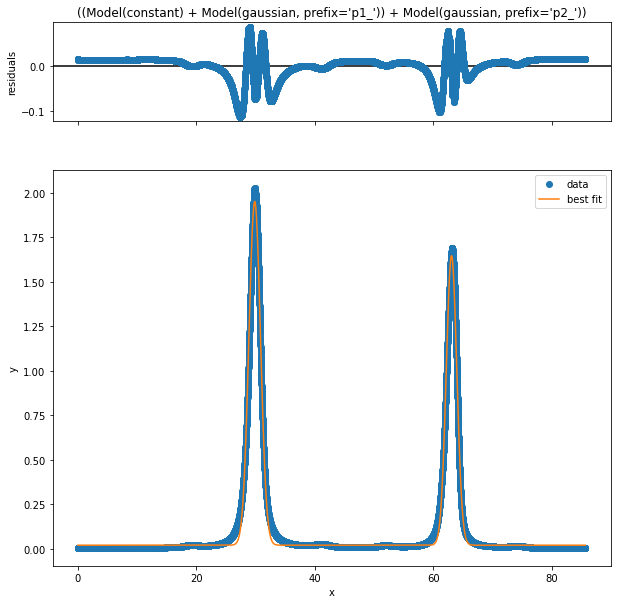

In [215]:
model_fit = model.fit(ydata, params, x=xdata)

print(model_fit.fit_report(show_correl=False))

myfig=plt.figure(figsize=(10,10))
model_fit.plot(fig=myfig);

Save the peak locations and uncertainty into uncertainty objects `ufloat`.  These are in the parameters `p1_center` and `p2_center`.  Notice how the code below searches out the `_center` parameters using a string search function.

Calculations with uncertainty objects will automatically propagate the uncertainty.

In [216]:
Peak_loc = []

for parm in model_fit.params:
    if parm.endswith('center'):
        # make an uncertainty object
        print(model_fit.params[parm].value, model_fit.params[parm].stderr)
        this_center = unc.ufloat(model_fit.params[parm].value, model_fit.params[parm].stderr)
        # add it to the Python list
        Peak_loc.append(this_center)
        # also print it
        print('Peak at {:.2uP} s'.format(this_center))

# Save the list to a new variable 
Na_loc = Peak_loc.copy()

29.846315375956124 0.0013943313241071488
Peak at 29.8463±0.0014 s
63.07957245931106 0.0015783235801473242
Peak at 63.0796±0.0016 s


Next, calculate the calibration constant with its uncertainty.  This is easy if you are using the uncertainty object.

The calibration constant $K_\text{Na}$ is simply

$$ K_\text{Na} = \frac{\lambda_{\text{D}_1}-\lambda_{\text{D}_2}}{t_{\text{D}_1}-t_{\text{D}_2}}$$

By definition, $D_1$ has a longer wavelength than $D_2$.

In [217]:
D1 = 5895.92 # Angstroms
D2 = 5889.95 # Angstroms

Na1_cal = (D1-D2)/(Na_loc[1]-Na_loc[0])

print('Calibration constant from peak-fit method: {:.2uP} A/s'.format(Na1_cal))

Calibration constant from peak-fit method: 0.179639±0.000011 A/s


## Part 2 - Data reduction

### Read in and plot all of the data

Before doing any calculations, you shoul always plot and look hard at your data.

Repeat the steps at the beginning to feed each data set into a Pandas dataframe.

In [218]:
## Collect all the data sets into active dataframes. 
## Follow the method used for the Na lines
## Recommended names  for the dataframes 'Alpha', 'Beta', 'Gamma', etc.

colnames = ['TIME', 'CH1']

Alpha = pd.read_csv('HD_alpha.csv', names = colnames, skiprows=1, header = None)
Beta = pd.read_csv('HD_beta.csv', names = colnames, skiprows=1, header = None)
Gamma = pd.read_csv('HD_gamma.csv', names = colnames, skiprows=1, header = None)
Delta = pd.read_csv('HD_delta.csv', names = colnames, skiprows=1, header = None)
Epsilon1 = pd.read_csv('HD_epsilon1.csv', names = colnames, skiprows=1, header = None)
Epsilon2 = pd.read_csv('HD_epsilon2.csv', names = colnames, skiprows=1, header = None)
Epsilon3 = pd.read_csv('HD_epsilon3.csv', names = colnames, skiprows=1, header = None)


Now plot all on one graph.  Note use of "-" to flip all data sets to positive

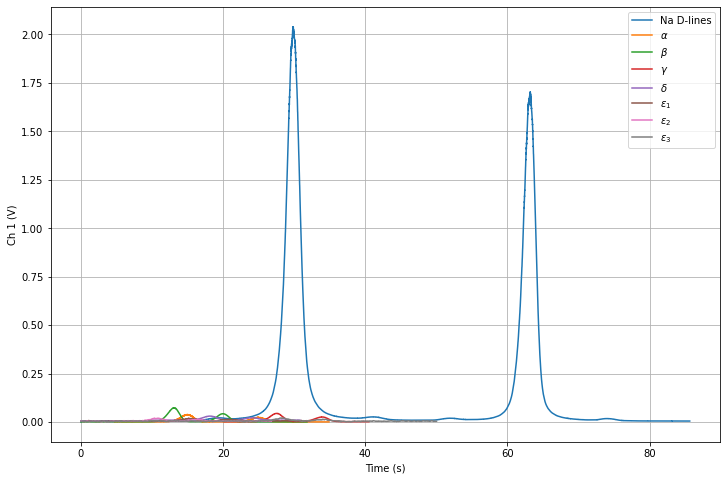

In [219]:
plt.figure(figsize=(12,8))
plt.plot(Na['TIME'],Na['CH1'],'-',label='Na D-lines')

plt.plot(Alpha['TIME'],Alpha['CH1'],label=r'$\alpha$')
plt.plot(Beta['TIME'],Beta['CH1'],label=r'$\beta$')
plt.plot(Gamma['TIME'],Gamma['CH1'],label=r'$\gamma$')
plt.plot(Delta['TIME'],Delta['CH1'],label=r'$\delta$')
plt.plot(Epsilon1['TIME'],Epsilon1['CH1'],label=r'$\epsilon_1$')
plt.plot(Epsilon2['TIME'],Epsilon2['CH1'],label=r'$\epsilon_2$')
plt.plot(Epsilon3['TIME'],Epsilon3['CH1'],label=r'$\epsilon_3$')

plt.xlabel(r'Time (s)')
plt.ylabel(r'Ch 1 (V)')
plt.legend()
plt.grid();

Hard to read.  Let's offset the plots and rescale them.  Note use of multiplication factors

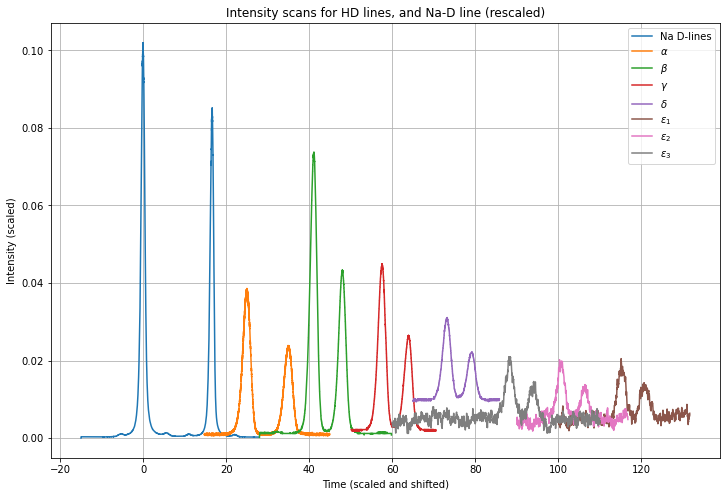

In [220]:
## Cut and paste above, and then manipulate arrays within the plot() calls

plt.figure(figsize=(12,8))
plt.plot(0.5 * Na['TIME']-15,0.05 * Na['CH1'],'-',label='Na D-lines')

plt.plot(Alpha['TIME']+10,Alpha['CH1'],label=r'$\alpha$')
plt.plot(Beta['TIME']+28,Beta['CH1'],label=r'$\beta$')
plt.plot(Gamma['TIME']+30,Gamma['CH1'],label=r'$\gamma$')
plt.plot(Delta['TIME']+55,Delta['CH1'],label=r'$\delta$')
plt.plot(Epsilon1['TIME']+100,Epsilon1['CH1'],label=r'$\epsilon_1$')
plt.plot(Epsilon2['TIME']+90,Epsilon2['CH1'],label=r'$\epsilon_2$')
plt.plot(Epsilon3['TIME']+60,Epsilon3['CH1'],label=r'$\epsilon_3$')

plt.title('Intensity scans for HD lines, and Na-D line (rescaled)')
plt.xlabel(r'Time (scaled and shifted)')
plt.ylabel(r'Intensity (scaled)')
plt.legend()
plt.grid();


### Process each data file

At this point, you want to apply the same basic steps to each H-D spectrum files, namely:

* Smooth it.
* Locate the peak positions and widths.
* Use this information to feed the starting values for the fitting model.
* Extract the peak centers and uncertainty from the fit results.
* Calculate $\Delta t_\text{HD}$ for that data set, and save it.

Before doing these steps, convert the code blocks used to carry out these tasks above to functions.  This will make your code reuse less messy and easier to run.

In [221]:
## Function to locate the peaks, plot them, and return the important data

def find_and_plot_peaks(ydata, title='Data', min_width=50, makeplot=False):
    '''
    Function locates peaks using SciPy.signal find_peaks() and plots
    the results (optionally).  Returns two arrays: 'peaks' which holds
    the index of each peak maximum and 'widths' which holds the FWHM of
    each peak.
    '''

    # Below does the work.  The height parameter makes the function only look 
    # for peaks higher than halfway up the tallest peak.
    peaks, pk_props = find_peaks(ydata, width = min_width, height = ydata.max()/2.)

    for pk, width in zip(peaks, pk_props['widths']): 
        print('Peak at {:d} has width {:.1f}'.format(pk, width))
        
    if makeplot:
        plt.figure(figsize=(12,8))
        plt.grid()
        plt.title(title)
        plt.ylabel(r'Intensity (V)')
        plt.xlabel(r'Array index')
        plt.plot(ydata,'-',label='Smoothed data')
        plt.vlines(x=peaks, ymin=0, ymax=ydata[peaks], color='C2', label='Locations')
        plt.hlines(y=pk_props['width_heights'], xmin=peaks-pk_props['widths']/2, 
                   xmax=peaks+pk_props['widths']/2, color = 'C1', label='Widths')
        plt.legend();
        
    
    
    return peaks, pk_props['widths']
    


In [222]:
## Function to obtain starting values for fit
def guess_start_params(xdata, ydata, peaks, widths, params):
    '''
    Calculates starting values for the peak fitting routine.  
    Returns params object
    '''
    
    # convert data
    xpeaks = np.array([xdata[peaks[0]], xdata[peaks[1]]])
    
    xwidths = widths*idx2time
    
    
    # Peak 1 starting values

    p1_loc = xpeaks[0]
    p1_sig = xwidths[0]/2.3548
    p1_amp = ydata[peaks[0]]*xwidths[0]

    # Peak 2 starting values

    p2_loc = xpeaks[1]
    p2_sig = xwidths[1]/2.3548
    p2_amp = ydata[peaks[1]]*xwidths[1]

    # Build the parameters

    params['p1_center'].set(value=p1_loc, vary=True)
    params['p1_amplitude'].set(value=p1_amp, vary=True)
    params['p1_sigma'].set(value=p1_sig, vary=True)

    params['p2_center'].set(value=p2_loc, vary=True)
    params['p2_amplitude'].set(value=p2_amp, vary=True)
    params['p2_sigma'].set(value=p2_sig, vary=True)

    params['c'].set(value = 0.01, vary=True)
    
    params.pretty_print(columns=['value','vary'])
    
    return params


In [223]:
def calculate_peak_locs(xdata, ydata, params):
    '''
    Fit data to two gaussian peaks and extract peak positions.
    Plots result and extracts centers with uncertainty.
    Returns a list of uncertainty objects
    '''
    
    model_fit = model.fit(ydata, params, x=xdata)
    
    Peak_loc = []

    for param in model_fit.params:
        if param.endswith('center'):
            # make an uncertainty object
            this_center = unc.ufloat(model_fit.params[param].value, model_fit.params[param].stderr)
            # add it to the Python list
            Peak_loc.append(this_center)
            # also print it
            print('Peak at {:.2uP} s'.format(this_center))
            
    print(model_fit.fit_report(show_correl=False))

    myfig=plt.figure(figsize=(10,10))
    model_fit.plot(fig=myfig);
    
    
    return Peak_loc


Peak at 3484 has width 248.3
Peak at 7377 has width 232.5
Name             Value     Vary
c                 0.01     True
p1_amplitude     4.306     True
p1_center        29.84     True
p1_fwhm          2.127    False
p1_height        1.902    False
p1_sigma        0.9031     True
p2_amplitude     3.367     True
p2_center        63.19     True
p2_fwhm          1.992    False
p2_height        1.588    False
p2_sigma        0.8457     True
Peak at 29.8463±0.0014 s
Peak at 63.0796±0.0016 s
[[Model]]
    ((Model(constant) + Model(gaussian, prefix='p1_')) + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 10000
    # variables        = 7
    chi-square         = 7.68059285
    reduced chi-square = 7.6860e-04
    Akaike info crit   = -71702.4363
    Bayesian info crit = -71651.9640
[[Variables]]
    c:             0.02031735 +/- 2.9480e-04 (1.45%) (init = 0.01)
    p1_amplitude:  4.72412804 +/- 0.00604201 

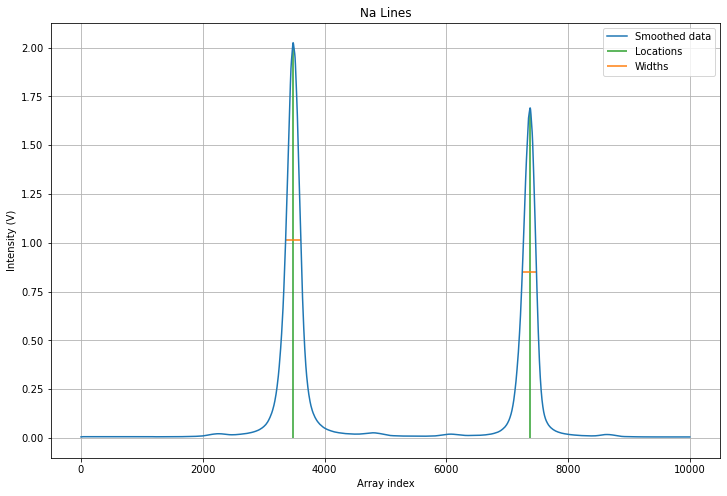

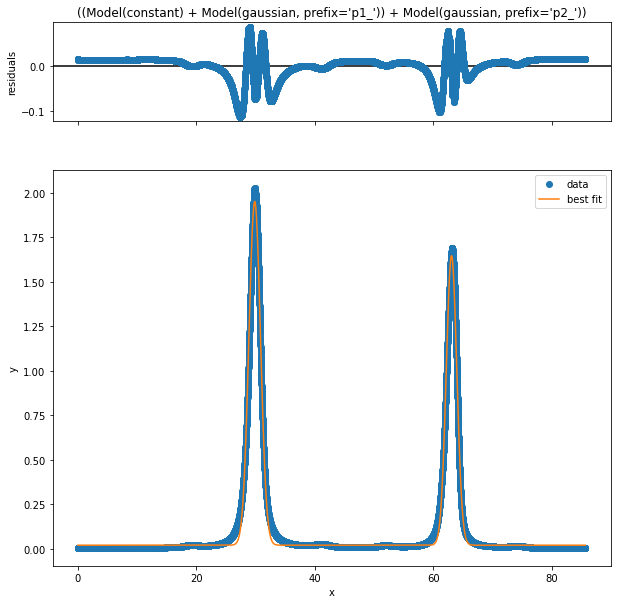

In [224]:
## Test the above.  Recommend commenting out later lines and examining the return values at each step

ydata = Na['CH1_smoothed']
xdata = Na['TIME']

Na_pks, Na_widths = find_and_plot_peaks(ydata, title='Na Lines', min_width = 50, makeplot=True)

Na_start_params = guess_start_params(xdata, ydata, Na_pks, Na_widths, params)
#Na_start_params

# print('\n start params \n \n', Na_start_params)

Na_test_loc = calculate_peak_locs(xdata, ydata, Na_start_params)

Peak at 34688 has width 4356.7
Peak at 100755 has width 4044.8
Name             Value     Vary
c                 0.01     True
p1_amplitude     74.72     True
p1_center        17.34     True
p1_fwhm          37.32    False
p1_height        1.881    False
p1_sigma         15.85     True
p2_amplitude     58.16     True
p2_center        50.38     True
p2_fwhm          34.65    False
p2_height        1.577    False
p2_sigma         14.71     True
Peak at 17.28176±0.00039 s
Peak at 50.30549±0.00043 s
[[Model]]
    ((Model(constant) + Model(gaussian, prefix='p1_')) + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 152
    # data points      = 131800
    # variables        = 7
    chi-square         = 126.740153
    reduced chi-square = 9.6166e-04
    Akaike info crit   = -915587.677
    Bayesian info crit = -915519.153
[[Variables]]
    c:             0.02530167 +/- 9.2817e-05 (0.37%) (init = 0.01)
    p1_amplitude:  4.77689399 +/- 

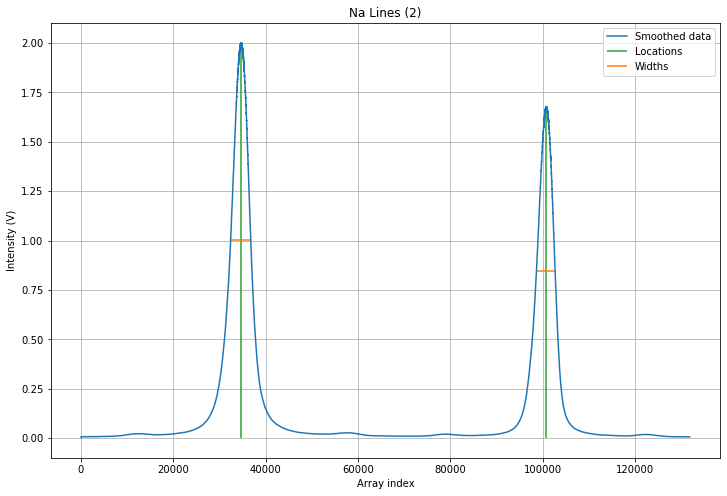

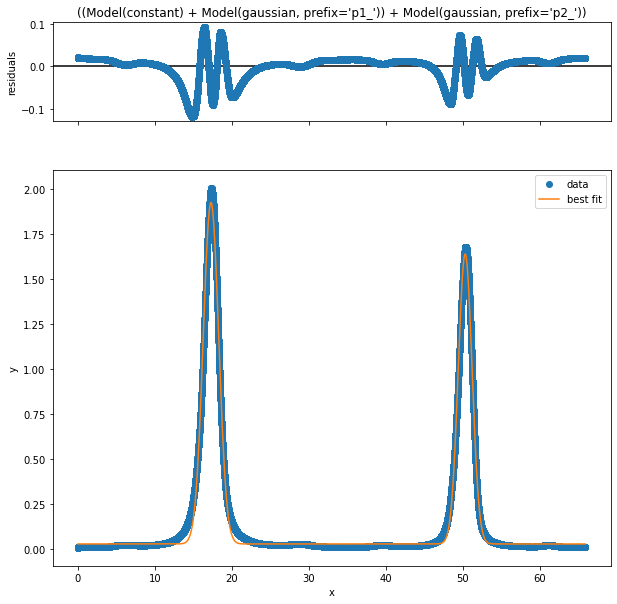

In [225]:
### For the second Na dataset

ydata = Na2['CH1_smoothed']
xdata = Na2['TIME']

Na2_pks, Na2_widths = find_and_plot_peaks(ydata, title='Na Lines (2)', min_width = 50, makeplot=True)

Na2_start_params = guess_start_params(xdata, ydata, Na2_pks, Na2_widths, params)


Na2_loc = calculate_peak_locs(xdata, ydata, Na2_start_params)

In [226]:
### calibration averaged over both sets

Na2_cal = (D1-D2)/(Na2_loc[1]-Na2_loc[0])

Na_cal = (Na2_cal + Na1_cal)/2 

print('Calibration constant from peak-fit method, averaged over two datasets: {:.2uP} A/s'.format(Na_cal))

Calibration constant from peak-fit method, averaged over two datasets: 0.1802092±0.0000059 A/s


### Apply the functions

Work on Alpha first. I show this as an example.  Reuse `xdata`, `ydata`, `peaks`, `widths` and `start_params` to save typing.  **But be careful:** if you execute cells out of sequence, you will get peculiar results!!

Peak at 3390 has width 717.7
Peak at 6720 has width 784.5
Name             Value     Vary
c                 0.01     True
p1_amplitude    0.2334     True
p1_center        14.97     True
p1_fwhm          6.148    False
p1_height      0.03566    False
p1_sigma         2.611     True
p2_amplitude    0.1573     True
p2_center        25.01     True
p2_fwhm           6.72    False
p2_height      0.02199    False
p2_sigma         2.854     True
Peak at 14.89701±0.00082 s
Peak at 24.9103±0.0014 s
[[Model]]
    ((Model(constant) + Model(gaussian, prefix='p1_')) + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 58
    # data points      = 10000
    # variables        = 7
    chi-square         = 0.00286541
    reduced chi-square = 2.8674e-07
    Akaike info crit   = -150639.845
    Bayesian info crit = -150589.373
[[Variables]]
    c:             0.00110596 +/- 6.5922e-06 (0.60%) (init = 0.01)
    p1_amplitude:  0.08494357 +/- 7.2945e-0

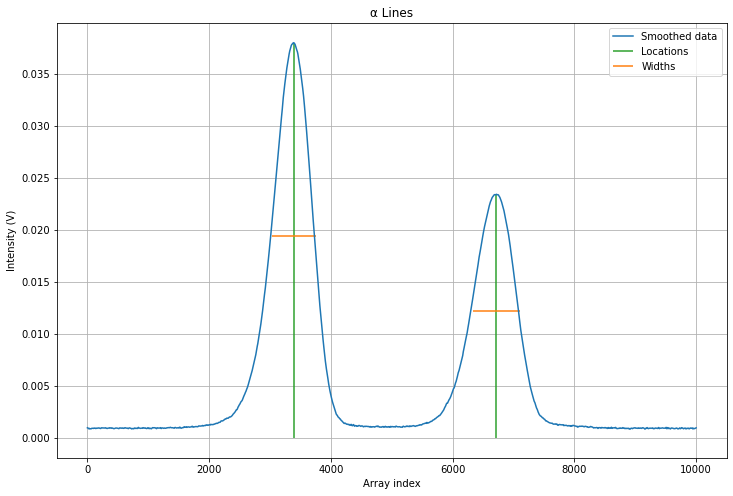

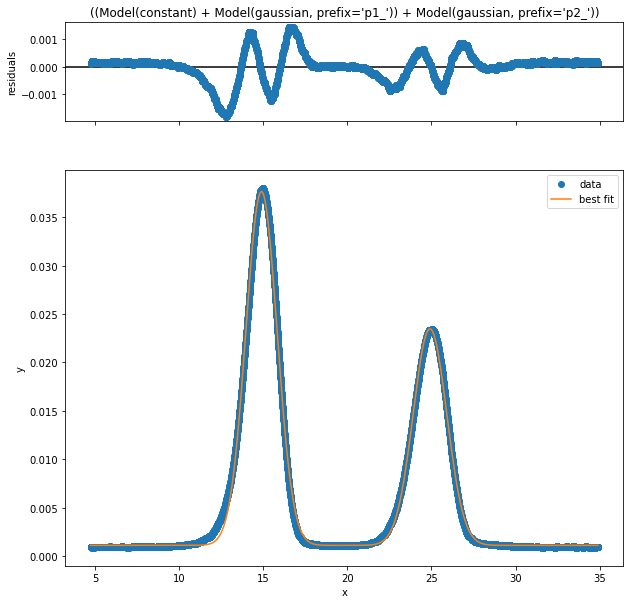

In [227]:
Alpha['CH1_smoothed'] = gaussian_filter1d(Alpha['CH1'], 5)

xdata = Alpha['TIME']
ydata = Alpha['CH1_smoothed']

Alpha_peaks, Alpha_widths = find_and_plot_peaks(ydata, title='α Lines', min_width = 50, makeplot=True)

Alpha_start_params = guess_start_params(xdata, ydata, Alpha_peaks, Alpha_widths, params)
#Na_start_params

# print('\n start params \n \n', Na_start_params)

Alpha_loc = calculate_peak_locs(xdata, ydata, Alpha_start_params)

Next step: Fit and grab peaks.

Results saved to `Alpha_loc`.  Will repeat for `Beta_loc`, `Gamma_loc`, etc.

### Repeat for other lines.  

Beta next.

Peak at 2620 has width 373.0
Peak at 3989 has width 396.1
Name             Value     Vary
c                 0.01     True
p1_amplitude    0.2344     True
p1_center         13.1     True
p1_fwhm          3.195    False
p1_height      0.06893    False
p1_sigma         1.357     True
p2_amplitude    0.1462     True
p2_center        19.95     True
p2_fwhm          3.393    False
p2_height      0.04049    False
p2_sigma         1.441     True
Peak at 13.00441±0.00092 s
Peak at 19.9235±0.0016 s
[[Model]]
    ((Model(constant) + Model(gaussian, prefix='p1_')) + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 6360
    # variables        = 7
    chi-square         = 0.00588707
    reduced chi-square = 9.2666e-07
    Akaike info crit   = -88344.0856
    Bayesian info crit = -88296.7811
[[Variables]]
    c:             0.00147608 +/- 1.4222e-05 (0.96%) (init = 0.01)
    p1_amplitude:  0.14378753 +/- 1.5376e-04

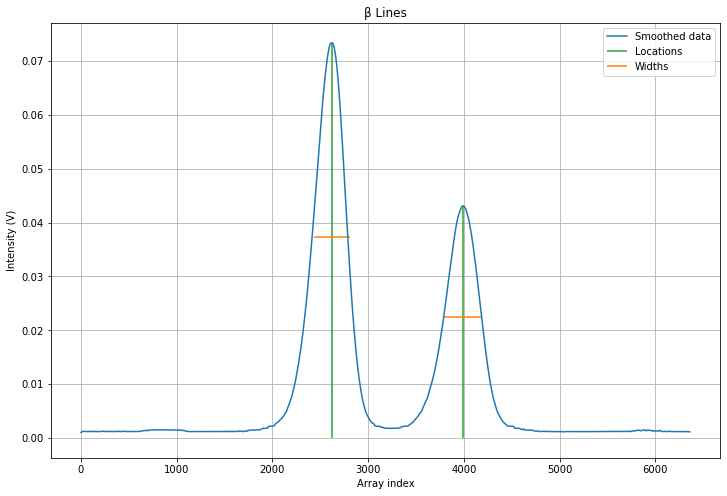

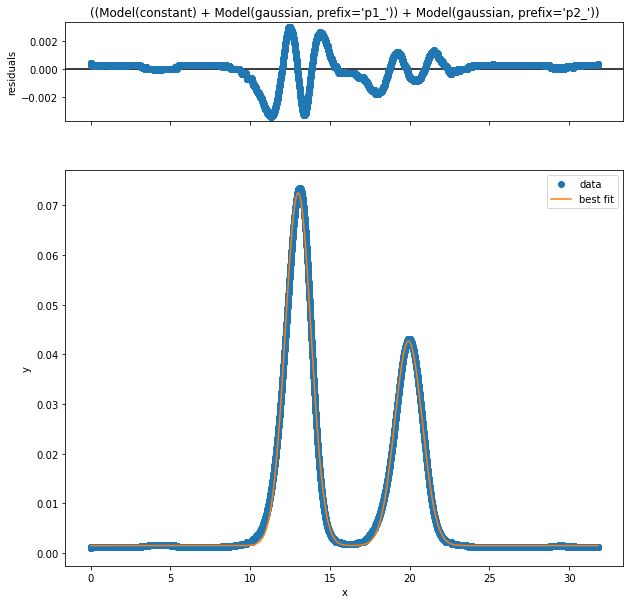

In [228]:
Beta['CH1_smoothed'] = gaussian_filter1d(Beta['CH1'], 5)

xdata = Beta['TIME']
ydata = Beta['CH1_smoothed']

Beta_peaks, Beta_widths = find_and_plot_peaks(ydata, title='β Lines', min_width = 50, makeplot=True)

Beta_start_params = guess_start_params(xdata, ydata, Beta_peaks, Beta_widths, params)

Beta_loc = calculate_peak_locs(xdata, ydata, Beta_start_params)

Gamma next.

Peak at 3133 has width 887.0
Peak at 5799 has width 908.1
Name             Value     Vary
c                 0.01     True
p1_amplitude    0.3396     True
p1_center        27.57     True
p1_fwhm          7.598    False
p1_height      0.04199    False
p1_sigma         3.227     True
p2_amplitude    0.2044     True
p2_center        33.92     True
p2_fwhm          7.778    False
p2_height      0.02468    False
p2_sigma         3.303     True
Peak at 27.46396±0.00081 s
Peak at 33.8110±0.0015 s
[[Model]]
    ((Model(constant) + Model(gaussian, prefix='p1_')) + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 83
    # data points      = 8560
    # variables        = 7
    chi-square         = 0.00406023
    reduced chi-square = 4.7471e-07
    Akaike info crit   = -124631.342
    Bayesian info crit = -124581.958
[[Variables]]
    c:             0.00226378 +/- 1.0328e-05 (0.46%) (init = 0.01)
    p1_amplitude:  0.09533882 +/- 8.9034e-05

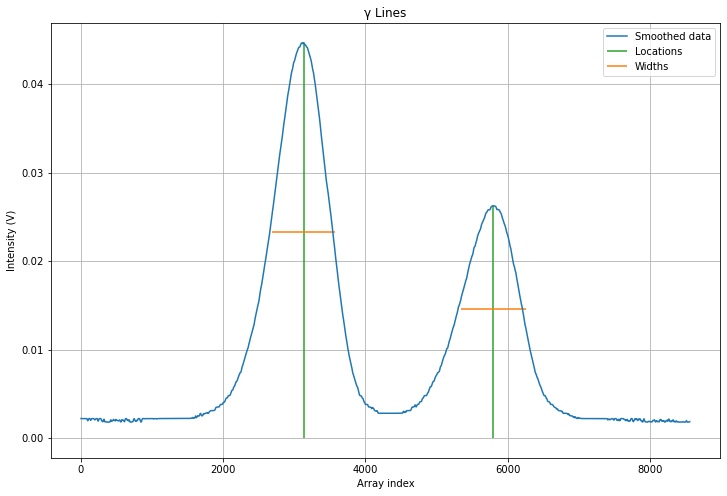

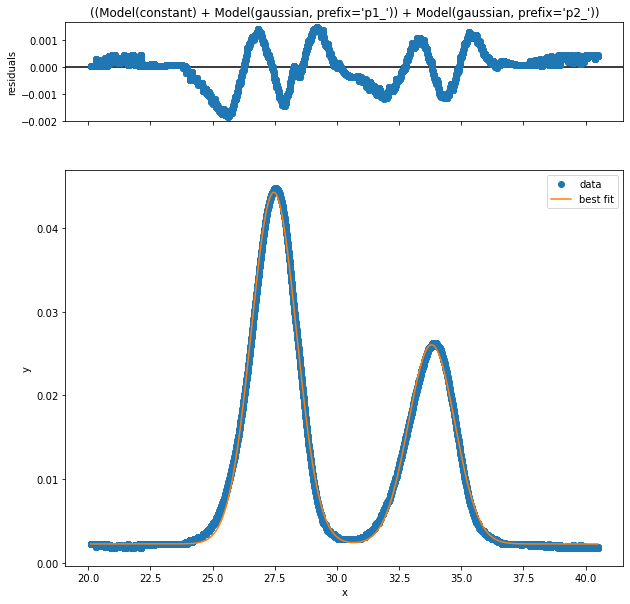

In [229]:
Gamma['CH1_smoothed'] = gaussian_filter1d(Gamma['CH1'], 5)

xdata = Gamma['TIME']
ydata = Gamma['CH1_smoothed']

Gamma_peaks, Gamma_widths = find_and_plot_peaks(ydata, title='γ Lines', min_width = 50, makeplot=True)

Gamma_start_params = guess_start_params(xdata, ydata, Gamma_peaks, Gamma_widths, params)

Gamma_loc = calculate_peak_locs(xdata, ydata, Gamma_start_params)

Delta next.

Peak at 2740 has width 760.3
Peak at 4692 has width 699.1
Name             Value     Vary
c                 0.01     True
p1_amplitude    0.2017     True
p1_center        18.23     True
p1_fwhm          6.513    False
p1_height      0.02909    False
p1_sigma         2.766     True
p2_amplitude    0.1329     True
p2_center        24.13     True
p2_fwhm          5.988    False
p2_height      0.02085    False
p2_sigma         2.543     True
Peak at 18.09985±0.00084 s
Peak at 24.0282±0.0014 s
[[Model]]
    ((Model(constant) + Model(gaussian, prefix='p1_')) + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 115
    # data points      = 6900
    # variables        = 7
    chi-square         = 6.2062e-04
    reduced chi-square = 9.0036e-08
    Akaike info crit   = -111932.120
    Bayesian info crit = -111884.246
[[Variables]]
    c:             0.00993115 +/- 5.0870e-06 (0.05%) (init = 0.01)
    p1_amplitude:  0.05122185 +/- 4.6255e-0

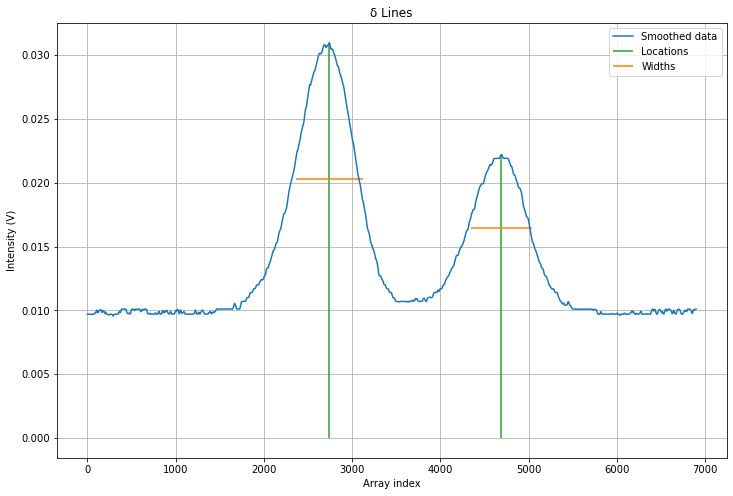

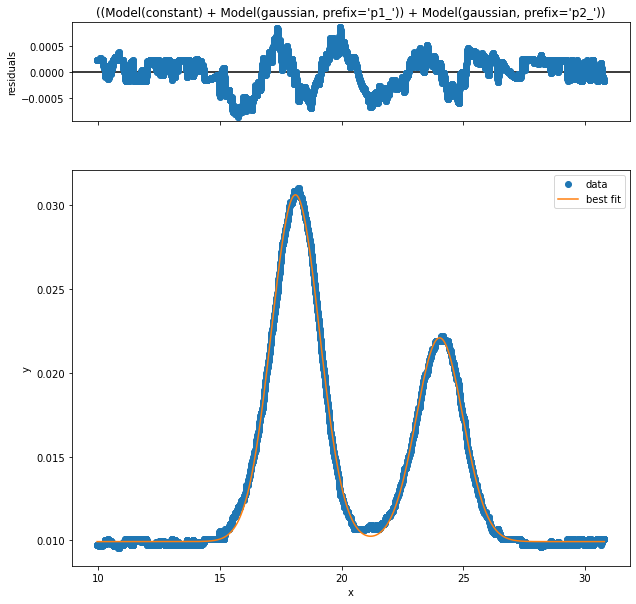

In [230]:
Delta['CH1_smoothed'] = gaussian_filter1d(Delta['CH1'], 5)

xdata = Delta['TIME']
ydata = Delta['CH1_smoothed']

Delta_peaks, Delta_widths = find_and_plot_peaks(ydata, title='δ Lines', min_width = 50, makeplot=True)

Delta_start_params = guess_start_params(xdata, ydata, Delta_peaks, Delta_widths, params)

Delta_loc = calculate_peak_locs(xdata, ydata, Delta_start_params)


Finally, Epsilon lines (3 sets).

Peak at 606 has width 95.1
Peak at 828 has width 103.1
Name             Value     Vary
c                 0.01     True
p1_amplitude   0.01485     True
p1_center        15.15     True
p1_fwhm         0.8143    False
p1_height      0.01713    False
p1_sigma        0.3458     True
p2_amplitude   0.01177     True
p2_center         20.7     True
p2_fwhm         0.8828    False
p2_height      0.01252    False
p2_sigma        0.3749     True
Peak at 15.2668±0.0095 s
Peak at 20.830±0.016 s
[[Model]]
    ((Model(constant) + Model(gaussian, prefix='p1_')) + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 49
    # data points      = 1268
    # variables        = 7
    chi-square         = 7.1199e-04
    reduced chi-square = 5.6462e-07
    Akaike info crit   = -18235.8772
    Bayesian info crit = -18199.8608
[[Variables]]
    c:             0.00506123 +/- 2.5961e-05 (0.51%) (init = 0.01)
    p1_amplitude:  0.03177491 +/- 2.9948e-04 (0.94%

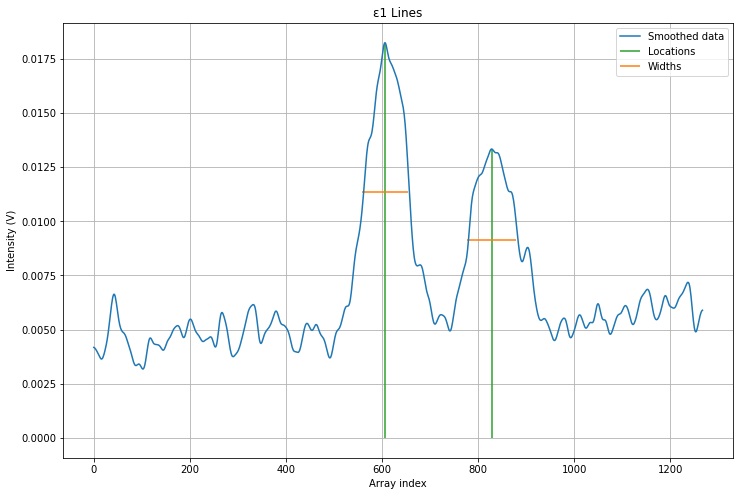

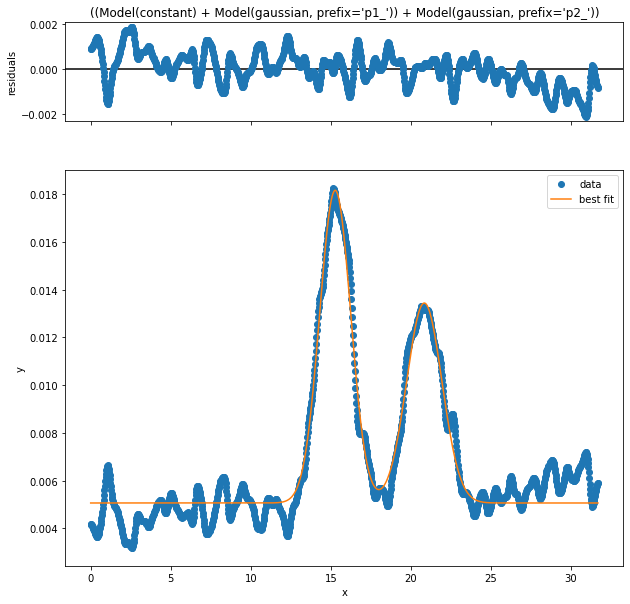

In [231]:
Epsilon1['CH1_smoothed'] = gaussian_filter1d(Epsilon1['CH1'], 5)

xdata = Epsilon1['TIME']
ydata = Epsilon1['CH1_smoothed']

Epsilon1_peaks, Epsilon1_widths = find_and_plot_peaks(ydata, title='ε1 Lines', min_width = 50, makeplot=True)

Epsilon1_start_params = guess_start_params(xdata, ydata, Epsilon1_peaks, Epsilon1_widths, params)

Epsilon1_loc = calculate_peak_locs(xdata, ydata, Epsilon1_start_params)


Epslion 2

Peak at 434 has width 98.1
Peak at 656 has width 89.6
Name             Value     Vary
c                 0.01     True
p1_amplitude   0.01611     True
p1_center        10.85     True
p1_fwhm         0.8403    False
p1_height      0.01801    False
p1_sigma        0.3568     True
p2_amplitude   0.01002     True
p2_center         16.4     True
p2_fwhm         0.7679    False
p2_height      0.01226    False
p2_sigma        0.3261     True
Peak at 10.6607±0.0098 s
Peak at 16.257±0.017 s
[[Model]]
    ((Model(constant) + Model(gaussian, prefix='p1_')) + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 1072
    # variables        = 7
    chi-square         = 7.0708e-04
    reduced chi-square = 6.6393e-07
    Akaike info crit   = -15242.3243
    Bayesian info crit = -15207.4833
[[Variables]]
    c:             0.00479050 +/- 3.1661e-05 (0.66%) (init = 0.01)
    p1_amplitude:  0.03483813 +/- 3.3950e-04 (0.97%)

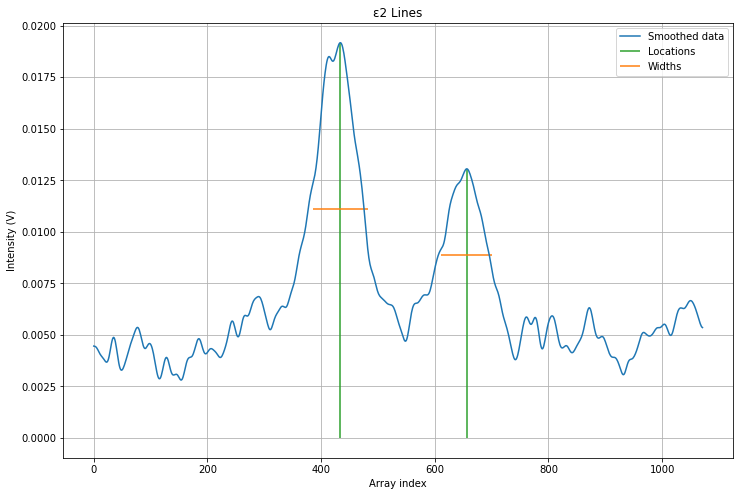

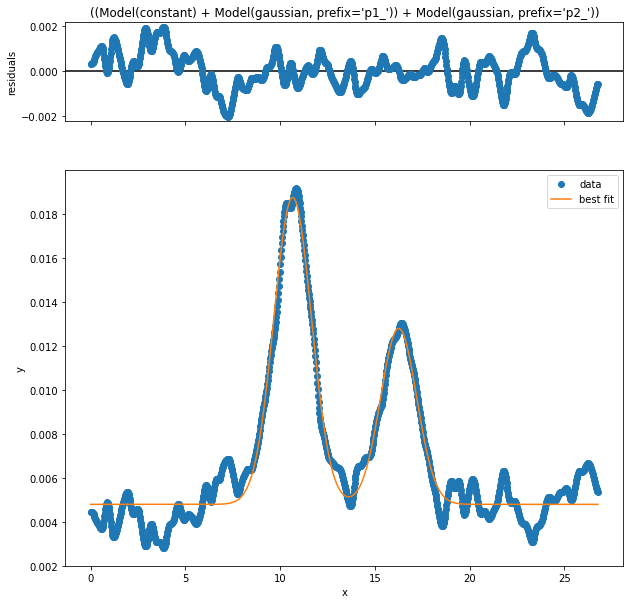

In [232]:
Epsilon2['CH1_smoothed'] = gaussian_filter1d(Epsilon2['CH1'], 5)

xdata = Epsilon2['TIME']
ydata = Epsilon2['CH1_smoothed']

Epsilon2_peaks, Epsilon2_widths = find_and_plot_peaks(ydata, title='ε2 Lines', min_width = 50, makeplot=True)

Epsilon2_start_params = guess_start_params(xdata, ydata, Epsilon2_peaks, Epsilon2_widths, params)

Epsilon2_loc = calculate_peak_locs(xdata, ydata, Epsilon2_start_params)


Epsilon 3

Peak at 1128 has width 104.0
Peak at 1375 has width 89.0
Name             Value     Vary
c                 0.01     True
p1_amplitude   0.01798     True
p1_center         28.2     True
p1_fwhm         0.8912    False
p1_height      0.01895    False
p1_sigma        0.3785     True
p2_amplitude   0.01023     True
p2_center        34.38     True
p2_fwhm         0.7627    False
p2_height       0.0126    False
p2_sigma        0.3239     True
Peak at 28.267±0.010 s
Peak at 33.896±0.016 s
[[Model]]
    ((Model(constant) + Model(gaussian, prefix='p1_')) + Model(gaussian, prefix='p2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 57
    # data points      = 2002
    # variables        = 7
    chi-square         = 0.00139556
    reduced chi-square = 6.9953e-07
    Akaike info crit   = -28367.0789
    Bayesian info crit = -28327.8656
[[Variables]]
    c:             0.00479181 +/- 2.1084e-05 (0.44%) (init = 0.01)
    p1_amplitude:  0.03918017 +/- 3.4087e-04 (0.87%

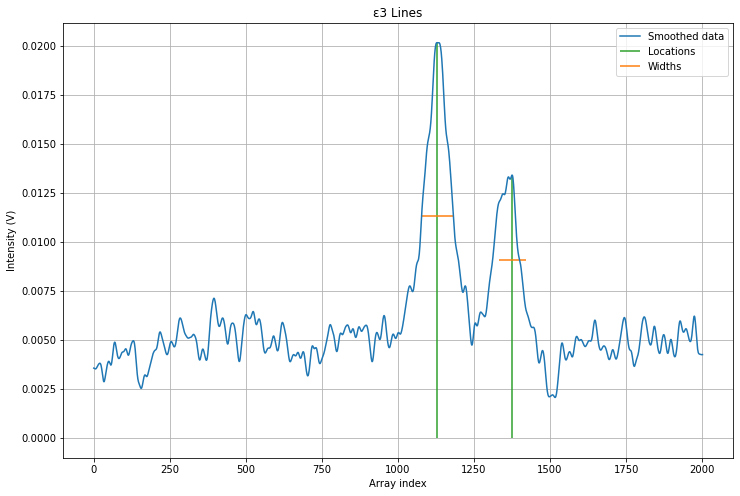

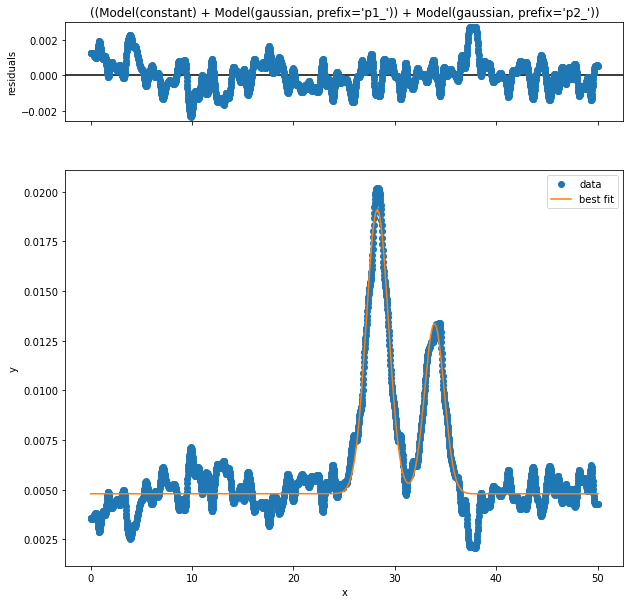

In [233]:
Epsilon3['CH1_smoothed'] = gaussian_filter1d(Epsilon3['CH1'], 5)

xdata = Epsilon3['TIME']
ydata = Epsilon3['CH1_smoothed']

Epsilon3_peaks, Epsilon3_widths = find_and_plot_peaks(ydata, title='ε3 Lines', min_width = 50, makeplot=True)

Epsilon3_start_params = guess_start_params(xdata, ydata, Epsilon3_peaks, Epsilon3_widths, params)

Epsilon3_loc = calculate_peak_locs(xdata, ydata, Epsilon3_start_params)


## Save the time differences

One easy way is to make a simple Python list:

In [234]:
D_T = [Alpha_loc[1]-Alpha_loc[0],
      Beta_loc[1]-Beta_loc[0],
      Gamma_loc[1]-Gamma_loc[0],
      Delta_loc[1]-Delta_loc[0],
      Epsilon1_loc[1]-Epsilon1_loc[0],
      Epsilon2_loc[1]-Epsilon2_loc[0],
      Epsilon3_loc[1]-Epsilon3_loc[0]]
D_T

[10.013269997421292+/-0.0016221595269506936,
 6.9190587515807636+/-0.0018729528936702348,
 6.347046776314393+/-0.00166584163312097,
 5.928369659989048+/-0.0016514231166374243,
 5.563384104545181+/-0.01848357590952939,
 5.596769487071089+/-0.019346251827957933,
 5.62853145744511+/-0.019096013504768482]

A fancier way is to build a Pandas Series.  I will also average the two epsilon runs.

In [235]:
Delta_T = pd.Series({'Alpha': Alpha_loc[1]-Alpha_loc[0],
                   'Beta': Beta_loc[1]-Beta_loc[0],
                   'Gamma': Gamma_loc[1]-Gamma_loc[0],
                   'Delta': Delta_loc[1]-Delta_loc[0],
                   'Epsilon': (Epsilon1_loc[1]+Epsilon2_loc[1]+Epsilon3_loc[1]-Epsilon1_loc[0]-Epsilon2_loc[0]-Epsilon3_loc[0])/3.0})
Delta_T

Alpha      10.0133+/-0.0016
Beta        6.9191+/-0.0019
Gamma       6.3470+/-0.0017
Delta       5.9284+/-0.0017
Epsilon       5.596+/-0.011
dtype: object

Then include the known hydrogen wavelengths $\lambda_\text{H}$.  A table can be found in Haken & Wolf, p.98

In [236]:
lambda_H = pd.Series({'Alpha': 6562.79,
                   'Beta': 4863.33,
                   'Gamma': 4340.46,
                   'Delta': 4101.73,
                   'Epsilon': 3970.07})
lambda_H

Alpha      6562.79
Beta       4863.33
Gamma      4340.46
Delta      4101.73
Epsilon    3970.07
dtype: float64

Build into a dataframe.

In [237]:
HD_results = pd.DataFrame({'lambda_H (A)':lambda_H, 'Delta-t (s)': Delta_T})
HD_results

,lambda_H (A),Delta-t (s)
Alpha,6562.79,10.0133+/-0.0016
Beta,4863.33,6.9191+/-0.0019
Gamma,4340.46,6.3470+/-0.0017
Delta,4101.73,5.9284+/-0.0017
Epsilon,3970.07,5.596+/-0.011


In [238]:
HD_results['Delta-lambda (A)'] = HD_results['Delta-t (s)']*Na_cal
HD_results

,lambda_H (A),Delta-t (s),Delta-lambda (A)
Alpha,6562.79,10.0133+/-0.0016,1.80448+/-0.00030
Beta,4863.33,6.9191+/-0.0019,1.24688+/-0.00034
Gamma,4340.46,6.3470+/-0.0017,1.14380+/-0.00030
Delta,4101.73,5.9284+/-0.0017,1.06835+/-0.00030
Epsilon,3970.07,5.596+/-0.011,1.0085+/-0.0020


## Make a plot

Plot the results of $\Delta t_\text{HD}$ versus $\lambda_\text{H}$ with the uncertainty as errorbars.  Include the origin in the plot.

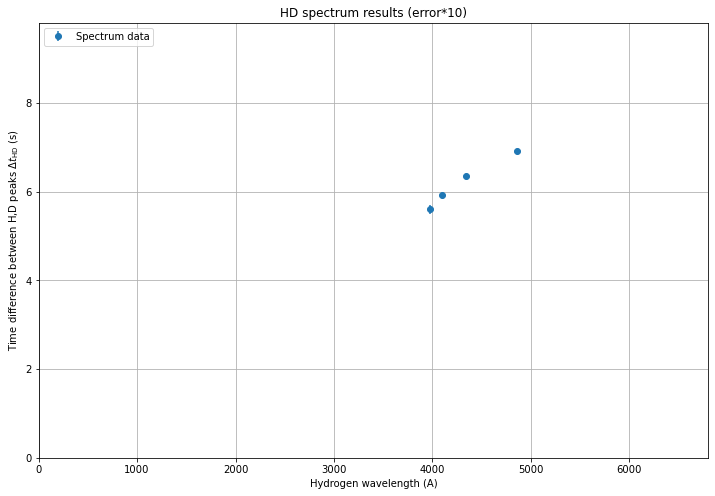

In [239]:
plt.figure(figsize=(12,8))
plt.grid()
plt.title('HD spectrum results (error*10)')
plt.ylim(0,9.8)
plt.xlim(0,6800.0)
plt.ylabel(r'Time difference between H,D peaks $\Delta t_{\rm HD}$ (s)')
plt.xlabel(r'Hydrogen wavelength (A)')
plt.errorbar(HD_results['lambda_H (A)'],up.nominal_values(HD_results['Delta-t (s)']),fmt='o',
             yerr=up.std_devs(HD_results['Delta-t (s)']*10),label='Spectrum data');
plt.legend();



## Fit to a line

Fit these results to a line that goes through zero.  Go back to the line fitting example, and copy the relevant code.


parameter names: ['slope', 'intercept']
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 5
    # variables        = 1
    chi-square         = 64804.9033
    reduced chi-square = 16201.2258
    Akaike info crit   = 49.3484932
    Bayesian info crit = 48.9579311
[[Variables]]
    slope:      2.6671e-04 +/- 3.8624e-06 (1.45%) (init = 0.5)
    intercept:  0 (fixed)


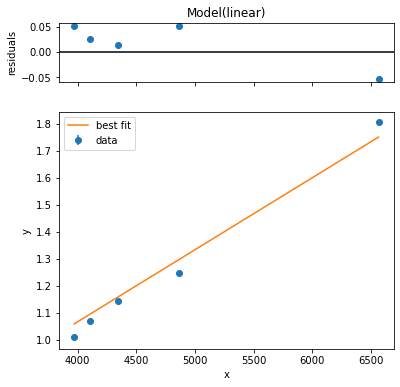

In [240]:
## Put the data into simple arrays: xdata, ydata, yuncert

xdata = HD_results['lambda_H (A)']
ydata = up.nominal_values(HD_results['Delta-t (s)']*Na_cal)
yuncert = up.std_devs(HD_results['Delta-t (s)']*Na_cal)

## Then use the earlier code starting with "param_guess = line.guess(wavelength, x=position)"

# param_guess = line.guess(ydata, x=xdata)
start_params = line.make_params()

print('parameter names: {}'.format(line.param_names))

start_params['slope'].set(value=0.5, vary=True)
start_params['intercept'].set(value=0, vary=False)

line_fit = line.fit(ydata, start_params, x=xdata, weights = 1/yuncert)

print(line_fit.fit_report())

line_fit.plot();


## Make a nice plot

Replot the above data-plot but include the fitline so that you can see the line go through zero.

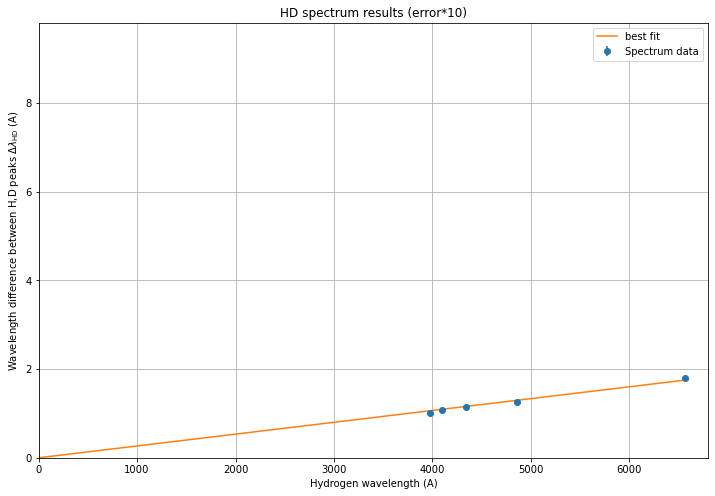

In [241]:
## Code below makes a fitline

xfit = np.linspace(0,6600,10)
yfit = line_fit.eval(line_fit.params, x=xfit)

## Cut and paste the earlier plot, and include the fitline.
plt.figure(figsize=(12,8))
plt.grid()
plt.title('HD spectrum results (error*10)')
plt.ylim(0,9.8)
plt.xlim(0,6800.0)
plt.ylabel(r'Wavelength difference between H,D peaks $\Delta \lambda_{\rm HD}$ (A)')
plt.xlabel(r'Hydrogen wavelength (A)')
plt.errorbar(HD_results['lambda_H (A)'],up.nominal_values(HD_results['Delta-lambda (A)']),fmt='o',
             yerr=up.std_devs(HD_results['Delta-lambda (A)']*10),label='Spectrum data');
plt.plot(xfit,yfit,label='best fit')
plt.legend();

From the experiment instructions, we can use the following equation to find the mass ratio, given the slope:

$$
\frac{\lambda_{HD}}{\lambda_H}=\frac{1-M_H/M_D}{1+M_H/m}$$
$$
M_H/M_D = 1 - \frac{\lambda_{HD}}{\lambda_H} (1 + M_H/m)
$$

In [242]:
## Save the slope from the fit.
HD_slope = unc.ufloat(line_fit.params['slope'].value,line_fit.params['slope'].stderr)

## Then use it in a calculation to obtain the mass ratio and uncertainty, and print it out
## You write code to calculate the mass ratio.

# slope = (1 - mass_ratio) / (1 + M_H/m) 
# mass_ratio = 1 - slope(1 + M_H/m)

print('1/slope:',1/HD_slope)

m = const.m_e
M_H = const.m_p

print('mass of proton/ mass of electron:',M_H/m)
print('HD_slope * (1+ M_H/m):',HD_slope * (1+ M_H/m))

mass_ratio = 1 - HD_slope * (1 + M_H/m)

## Literature value from experiment instructions
mass_ratio_true = 0.500248

percent_error = (mass_ratio - mass_ratio_true)/mass_ratio_true

print('\n\n\t\t --- RESULTS ---')
print('Calculated Mass ratio of hydrogen/deuterium = {:.1uP}'.format(mass_ratio))
print('Literature Mass ratio of hydrogen/deuterium = {:.8}'.format(mass_ratio_true))
print('Mass ratio of hydrogen/deuterium, percent error = {:.1uP}'.format(percent_error * 100),'%')

1/slope: (3.75+/-0.05)e+03
mass of proton/ mass of electron: 1836.1526734400013
HD_slope * (1+ M_H/m): 0.490+/-0.007


		 --- RESULTS ---
Calculated Mass ratio of hydrogen/deuterium = 0.510±0.007
Literature Mass ratio of hydrogen/deuterium = 0.500248
Mass ratio of hydrogen/deuterium, percent error = 2±1 %
